# Решаем задачу с фруктами

Задача сводится к решению уравнения, схематично изображённого на рисунке ниже

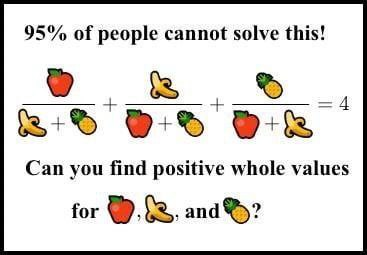

Результаты основанны на [посте в Quora](https://www.quora.com/How-do-you-find-the-positive-integer-solutions-to-frac-x-y+z-+-frac-y-z+x-+-frac-z-x+y-4/answer/Alon-Amit) и [статье](https://ami.uni-eszterhazy.hu/uploads/papers/finalpdf/AMI_43_from29to41.pdf).

In [ ]:
# Загружаем пакеты, которые понядобятся нам в дальнейшем
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from fractions import Fraction
import itertools
import tqdm

# Если вдруг не хватит знаков в выводе раскомментировать
#import sys
#sys.set_int_max_str_digits(0)

/home/bulat/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


После преобразования можно привести наше уравнение к Вейерштрассовой форме уравнения эллиптической кривой
\begin{equation}
y^2 = x^3 + (4N^2 + 12N-3)x^2+32(N+3)x.
\end{equation}

In [ ]:
# Функция, задающая нам правую часть уравнения на эллиптическую кривую
def f(x, N):
    return x**3 + (4*N**2 + 12*N -3)*x**2 + 32*(N + 3)*x

In [ ]:
# Фиксируем параметр N
N = 4

In [ ]:
# Получаем множество точек для графика кривой
x = np.linspace(-300, 100, 1000000)
valid_mask = f(x, N) >= 0
x_valid = x[valid_mask]
y_valid = np.sqrt(f(x_valid, N))
y_neg_valid = -np.sqrt(f(x_valid, N))

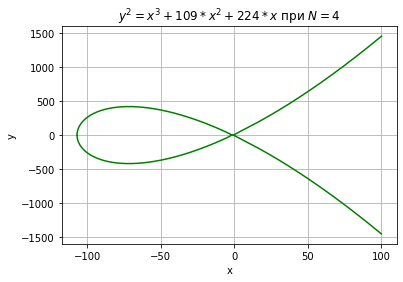

In [ ]:
# Строим график эллиптической кривой
plt.plot(x_valid, y_valid, color = 'g')
plt.plot(x_valid, y_neg_valid, color ='g')

plt.title(f'$y^2 = x^3 + {4*N**2 + 12*N - 3}*x^2 + {32*(N + 3)}*x$ при $N = {N}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [ ]:
# Ищем рациональные корни перебором, чтобы потом скормить их в алгоритм
a_range = range(-50, 50)
b_range = range(-50, 50)
c_range = range(-50, 50)
combinations = itertools.product(a_range, b_range, c_range)

df_init_cond = pd.DataFrame(columns=['x', 'y', 'a', 'b', 'c'])

for a, b, c in combinations:
    denominator = (2 * a + 2 * b - c) + N*(a+b)
    if denominator == 0 or a == 0 or b == 0 or c == 0 or a in (b, c) or b == c or a+b == 0 or b+c == 0 or a+c == 0:
        continue

    lhs = a*(a+c)*(a+b) + b*(b+c)*(a+b) + c*(b+c)*(a+c)
    rhs = N * (b+c)*(a+c)*(a+b)


    if lhs == rhs:
        gcd = math.gcd(a,b,c)
        a = int(a/gcd)
        b = int(b/gcd)
        c = int(c/gcd)

        if (a < 0) :
            a *= -1
            b *= -1
            c *= -1
        denom = (2 * a + 2 * b - c) + N*(a+b)
        y = Fraction(4*(a - b)*(N + 3)*(2*N + 5) , denom)
        x = Fraction(-4*(a + b + 2*c)*(N + 3) , denom)
        df_init_cond.loc[len(df_init_cond.index)] = [x, y, a, b, c]

In [ ]:
# Выводим на экран полученные значения (a, b, c)
df_init_cond.head()

,x,y,a,b,c
0,-56/25,728/125,11,9,-5
1,-4,28,11,4,-1
2,-9,78,11,-1,4
3,-224/9,5824/27,11,-5,9
4,-56/25,-728/125,9,11,-5


Видно, что по факту тут два различных набора $(a,\, b,\, c)$ - $(11,\, 4,\, -1)$ и $(11,\, 9,\,-5)$.

In [ ]:
# Удваривает рациональный корень P+P=2P
def double_root(x0, y0, N):
    a = Fraction(3*x0**2 + (4*N**2 + 12*N - 3)*2*x0 + 32*(N + 3), 2*y0)
    x = a*a - (4 * N**2 + 12 * N - 3) - 2*x0
    y = -a*x + a*x0 - y0
    return x, y

In [ ]:
# Складывает два различных корня P1+P2=P3
def add_roots(x1, y1, x2, y2, N):
    a = (y2 - y1)/(x2 - x1)
    x = a*a - (4 * N**2 + 12 * N - 3) - x1 -x2
    y = -a*x + a*x1 - y1
    return x, y

В качестве первого значения $(x,\,y)$ мы возьмём величины из [статьи на Quora](https://www.quora.com/How-do-you-find-the-positive-integer-solutions-to-frac-x-y+z-+-frac-y-z+x-+-frac-z-x+y-4/answer/Alon-Amit), они соответствуют корням $(11,\, 4,\, -1)$.

In [ ]:
x0 = Fraction(-100, 1)
y0 = Fraction(260, 1)

Рациональные точки на эллиптической кривой удовлетворяют [свойствам группы](https://crypto.stanford.edu/pbc/notes/elliptic/group.html) ([см. также](https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication)).В случае $N=4$ нам достаточно одной точки, чтобы [прибавляя её к самой себе](https://crypto.stanford.edu/pbc/notes/elliptic/explicit.html) получить все остальные рациональные точки на эллиптической кривой.

In [ ]:
# Сначала удвоим точку, а потом будем прибавлять её к выражению, полученному на предыдущем шаге
max_depth = 20 # Максимальое число перебираеммых a, b, c
counter = 1 # Счётчик
while True :
    # Выражаем a, b, c
    a = ((8 * (N + 3) - x + y) / (2 * (4 - x) * (N + 3)))
    b = ((8 * (N + 3) - x - y) / (2 * (4 - x) * (N + 3)))
    c = ((-4 * (N + 3) - (N + 2) * x) / ((4 - x) * (N + 3)))
    if a < 0 :
        a *= -1
        b *= -1
        c *= -1
    if (a > 0 and b > 0 and c > 0) or (counter > max_depth) :
        print(str(counter)+'P')
        break

    if counter == 1 :
        x, y = double_root(x0, y0, N)
    else :
        x, y = add_roots(x, y, x0, y0, N)
    counter += 1

9P


In [ ]:
# Вычисляем a, b, c и приводим их к выражнию в натуральных числах, используя проективную природу изначального уравнения
a = ((8 * (N + 3) - x + y) / (2 * (4 - x) * (N + 3)))
b = ((8 * (N + 3) - x - y) / (2 * (4 - x) * (N + 3)))
c = ((-4 * (N + 3) - (N + 2) * x) / ((4 - x) * (N + 3)))

lcm = math.lcm(a.denominator, b.denominator, c.denominator)
print('a =',a*lcm)
print('b =',b*lcm)
print('c =',c*lcm)

a = 154476802108746166441951315019919837485664325669565431700026634898253202035277999
b = 36875131794129999827197811565225474825492979968971970996283137471637224634055579
c = 4373612677928697257861252602371390152816537558161613618621437993378423467772036


Видно, что результат воспроизвёлся. Похожего рода манипуляции (нахождение одной рациональной точки на кривой и её многократное прибавление к самой себе) можно проделать в случае N=6